In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_url = 'https://bit.ly/HDSC-StageOneDataset'

In [3]:
data = pd.read_csv(test_url)

In [4]:
#preview the data
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


### Datat Description

'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

In [5]:
# create a list with the elements of A and B in a single dimension..
A = [1, 2, 3, 4, 5, 6]
B = [13, 21, 34]

In [6]:
A.extend(B)

In [18]:
B

[13, 21, 34]

In [19]:
#test for extend and append
A.extend(B)

In [20]:
A.append(B)

In [9]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
np.array([1,0,0],[0,1,0], [0,0,1])

ValueError: only 2 non-keyword arguments accepted

In [11]:
#finding the lowest average fuel cost per unit burned

#group -> slice -> aggregate -> sort
data.groupby('fuel_type_code_pudl', as_index=False)\
['fuel_cost_per_unit_burned']\
.mean().sort_values('fuel_cost_per_unit_burned')

,fuel_type_code_pudl,fuel_cost_per_unit_burned
1,gas,13.659397
4,other,18.253856
5,waste,19.518122
0,coal,67.421830
3,oil,168.877086
2,nuclear,4955.157002


we can clearly see that gas has the lowest average fuel cost per unit burned...

In [12]:
# Standard deviation of measure of energy per unit
std_dev = data['fuel_mmbtu_per_unit'].std()
print('Standard deviation of measure of energy per unit: ', round(std_dev, 2))

Standard deviation of measure of energy per unit:  10.6


In [13]:
# 75th percentile of measure of energy per unit
percentile_75th = data['fuel_mmbtu_per_unit'].quantile(.75)

print('75th percentile of measure of energy per unit: ', round(percentile_75th, 2))

75th percentile of measure of energy per unit:  17.01


In [14]:
#Skewness fuel quantity burned
fuel_qty_skewness = data.fuel_qty_burned.skew()
print(f'Skewness of Fuel quantity burned:  {np.round(fuel_qty_skewness, 2)}')

Skewness of Fuel quantity burned:  15.85


In [15]:
# kurtosis of fuel quantity burned
fuel_qty_kurtosis = data.fuel_qty_burned.kurtosis()
print(f'kurtosis of Fuel quantity burned:  {np.round(fuel_qty_kurtosis, 2)}')

kurtosis of Fuel quantity burned:  651.37


In [16]:
#Find Missing values 
data.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [17]:
perc_val = (data['fuel_unit'].isna().sum() / data.shape[0]) * 100
np.round(perc_val, 3)

0.61

fuel_unit has 180 missing values which amounts to 0.61% of the total number of rows...

In [18]:
#data type of fuel unit
data['fuel_unit'].dtype

dtype('O')

it appears as object... but let's inspect it's values

In [19]:
#first 5 values
data['fuel_unit'].head()

0    ton
1    ton
2    ton
3    ton
4    mcf
Name: fuel_unit, dtype: object

In [20]:
#unique values
data['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

Clearly it should be of type categorical

In [21]:
data['fuel_unit'] = data['fuel_unit'].astype('category')

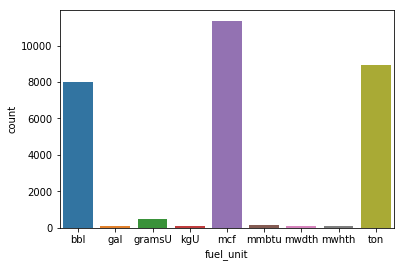

In [22]:
sns.countplot(data['fuel_unit'])

MCF is most common fuel unit and so it is the mode...another way to check..

In [23]:
data['fuel_unit'].mode()

0    mcf
Name: fuel_unit, dtype: category
Categories (9, object): [bbl, gal, gramsU, kgU, ..., mmbtu, mwdth, mwhth, ton]

In [24]:
#second and third lowest correlation with fuel cost per unit burned

#find correlation of the dataset
corr = data.corr()

#find correlation with respect to fuel cost per unit burned, sort the values
corr.fuel_cost_per_unit_burned.sort_values()

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

fuel_qty_burned and fuel_mmbtu_per_unit have the second and third lowest correlation with fuel cost per unit burned...

In [25]:
#percentage change in the fuel cost per unit burned in 1998 compared to 1994 for coal...

#percentage change = (change in values / old) * 100

#extract data of coal in 1994
coal_data_94 = data[(data['fuel_type_code_pudl']== 'coal') & (data['report_year'] == 1994)]

#extract data for coal in 1998
coal_data_98 = data[(data['fuel_type_code_pudl']== 'coal') & (data['report_year'] == 1998)]

In [26]:
old = coal_data_94['fuel_cost_per_unit_burned'].sum()
new = coal_data_98['fuel_cost_per_unit_burned'].sum()

In [28]:
change = new - old

In [30]:
perc_change = (change/old) * 100
perc_change = np.round(perc_change)
perc_change

-21.0

In [31]:
# year with the highest average fuel cost per unit delivered

#group -. slice -> aggregate -> sort
data.groupby('report_year').fuel_cost_per_unit_delivered.mean().sort_values(ascending=False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64